# ***1. Importing libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report



# **2. Data set Preparation**
The dataset used for the Titanic case study is a well-known dataset often used for machine learning practice. It contains information about passengers aboard the Titanic, including whether they survived or not. The dataset is publicly available and can be accessed from various sources, such as Kaggle or the seaborn library in Python.

Variables:

Dependent Variable:

"Survived": Binary variable indicating whether the passenger survived (1) or not (0).
Independent Variables:

"Sex": Categorical variable indicating the gender of the passenger.
"Age": Continuous variable representing the age of the passenger.
"Pclass": Categorical variable representing the ticket class of the passenger (1st, 2nd, or 3rd class).
Other variables like "Fare", "SibSp" (number of siblings/spouses aboard), "Parch" (number of parents/children aboard), and "Embarked" (port of embarkation) may also be included in the analysis.
Preprocessing steps:

Cleaning:

Handling missing values: Missing values in variables such as "Age" and "Embarked" may be imputed or removed from the dataset.
Removing unnecessary columns: Columns that are not relevant for analysis or modeling may be dropped.
Normalization/Standardization:

Depending on the modeling technique used, numerical variables like "Age" and "Fare" may be normalized or standardized to ensure they have similar scales.
Feature Engineering:

Encoding categorical variables: Categorical variables like "Sex" and "Embarked" may be encoded into numerical values using techniques like one-hot encoding.
Creating new features: New features may be created based on existing variables, such as extracting titles from passenger names or grouping ages into categories.

# **2. Load Dataset**

In [ ]:
df = pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 3. **Exploratory Data Analysis (EDA)**


Basic Statistics for Numerical Variables:
              Age        Fare
count  332.000000  417.000000
mean    30.272590   35.627188
std     14.181209   55.907576
min      0.170000    0.000000
25%     21.000000    7.895800
50%     27.000000   14.454200
75%     39.000000   31.500000
max     76.000000  512.329200

Frequency of Sex
Sex
male      266
female    152
Name: count, dtype: int64

Frequency of Pclass
Pclass
3    218
1    107
2     93
Name: count, dtype: int64

Frequency of Embarked
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


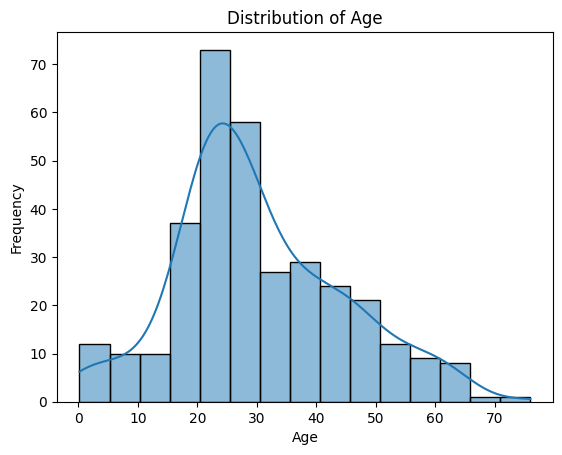

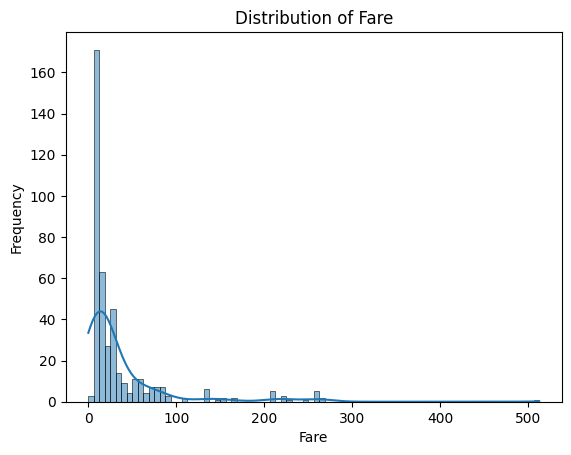

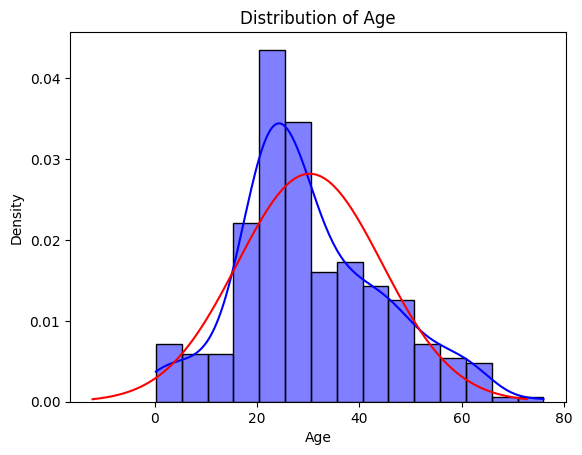

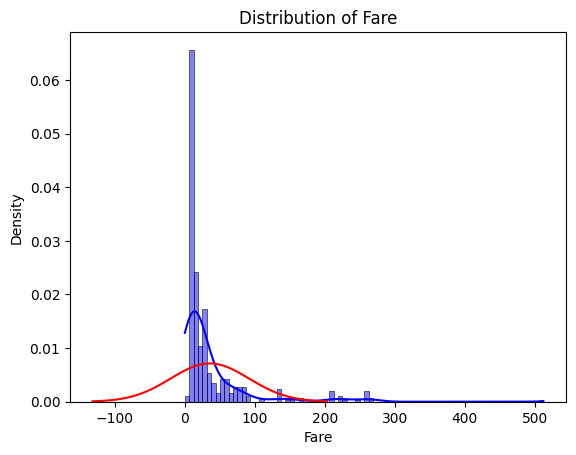

In [ ]:


# Descriptive Statistics
numeric_variables = ['Age', 'Fare']
categorical_variables = ['Sex', 'Pclass', 'Embarked']

# Calculate basic statistics
basic_stats = df[numeric_variables].describe()
print("Basic Statistics for Numerical Variables:")
print(basic_stats)

# Calculate frequencies for categorical variables
for col in categorical_variables:
    print("\nFrequency of", col)
    print(df[col].value_counts())

# Probability Distributions
# Visualize distribution of numerical variables
for col in numeric_variables:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Fit and visualize probability distributions (e.g., normal distribution)
for col in numeric_variables:
    sns.histplot(df[col], kde=True, stat='density', color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

    # Fit a normal distribution to the data
    mu, sigma = np.mean(df[col]), np.std(df[col])
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red')

    plt.show()



# **4. Linear Regression Model**

# **Theory Recap**
Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features).

  Understanding the relationships between variables is crucial in linear regression. This involves exploring correlations, scatter plots, and other visualization techniques to identify potential relationships.
  



# **Implenmentation:**

In [ ]:
#endcode caterogical variables Linear regression
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
# Convert categorical variables to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'Q': 0, 'S': 1, 'C': 2})
df = df.dropna()
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,0
1,1,3,1,47.0,1,0,7.0000,1
2,0,2,0,62.0,0,0,9.6875,0
3,0,3,0,27.0,0,0,8.6625,1
4,1,3,1,22.0,1,1,12.2875,1


In [ ]:
# Select independent and dependent variables
Xline = df[['Fare', 'Sex', 'Age']]
yline = df['Pclass']


# **Build the model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xline, yline, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# **Evaluation**
correlation between (fare, sex and age (X)) (Pclass (what type of class (Y)))

In [ ]:


print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
Y_pred = model.predict(X_test)

r_squared = r2_score(y_test, Y_pred)
print("R-squared:", r_squared)

rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
print("RMSE:", rmse)


Intercept: 3.017336592035153
Coefficients: [-0.00629843 -0.01242059 -0.02053481]
R-squared: 0.4855924328507589
RMSE: 0.6017587485765693


# 5. Logistic Regression Model

**Theory Recap**

Logistic Regression is a fundamental supervised learning algorithm used for binary classification problems.

Binary Classification:
Logistic Regression is primarily used for binary classification tasks where the target variable (dependent variable) has two possible outcomes, usually represented as 0 and 1.

Logistic Regression is a versatile and widely used algorithm in various fields, including healthcare (disease diagnosis), finance (credit scoring), and marketing (customer churn prediction), due to its simplicity, interpretability, and effectiveness in binary classification problems.


# **Implementation**

In [ ]:
#handling missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,0
1,1,3,1,47.0,1,0,7.0000,1
2,0,2,0,62.0,0,0,9.6875,0
3,0,3,0,27.0,0,0,8.6625,1
4,1,3,1,22.0,1,1,12.2875,1


In [ ]:
df_dumies = pd.get_dummies(df, drop_first=True)
df_dumies['Survived'] =  (df['Survived']>0).astype(int)
df_dumies

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,0
1,1,3,1,47.0,1,0,7.0000,1
2,0,2,0,62.0,0,0,9.6875,0
3,0,3,0,27.0,0,0,8.6625,1
4,1,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
409,1,3,1,3.0,1,1,13.7750,1
411,1,1,1,37.0,1,0,90.0000,0
412,1,3,1,28.0,0,0,7.7750,1
414,1,1,1,39.0,0,0,108.9000,2


In [ ]:
# Define features (independent variables) and target (dependent variable)
X = df_dumies.drop(['Survived', 'Embarked'], axis=1)
Y = df_dumies['Survived']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,0
1,1,3,1,47.0,1,0,7.0000,1
2,0,2,0,62.0,0,0,9.6875,0
3,0,3,0,27.0,0,0,8.6625,1
4,1,3,1,22.0,1,1,12.2875,1


# **Build the Model**

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y,test_size = 0.2, random_state=42 )

# **Model Training**


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, Y_train2)

LogisticRegression()

In [ ]:
Y_pred2 = model.predict(X_test_scaled)
Y_prob = model.predict_proba(X_test_scaled)[:, 1]


# **Evaluation**

Accuracy: 1.0
Confusion Matrix: 
[[45  0]
 [ 0 22]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



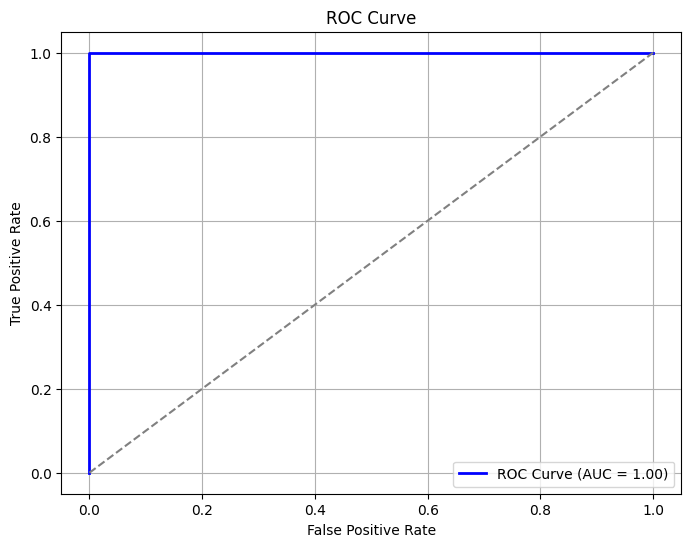

AUC Score: 1.0


In [ ]:
accuracy1 = accuracy_score(Y_test2, Y_pred2)
conf_matrix = confusion_matrix(Y_test2, Y_pred2)
class_report = classification_report(Y_test2, Y_pred2)
fpr, tpr, thresholds = roc_curve(Y_test2, Y_prob)

print(f"Accuracy: {accuracy1}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc_score(Y_test2, Y_prob))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate AUC
auc_score = roc_auc_score(Y_test2, Y_prob)
print("AUC Score:", auc_score)

# **6. Model Comparison and selection**

Comparing the linear and logistic regression models based on their performance metrics, as well as their suitability for different types of prediction problems, involves considering various factors such as model accuracy, interpretability, and assumptions:

# **Performance Metrics:**

**Linear Regression:**

R-squared: 0.486

RMSE: 0.602

**Logistic Regression:**

Accuracy: 1.0

Confusion Matrix


# **Suitability for Different Prediction Problems:**

**Linear Regression:**
Suitable for predicting continuous outcomes.

Example is right here where predicting correlation between correlation between (fare, sex and age (X)) (Pclass (what type of class (Y)))

**Logistic Regression:**

Suitable for binary classification problems.


Example is predicting survability

# **Decision-Making Process for Choosing a Model:**

**Accuracy:** In this case, the logistic regression model achieved perfect accuracy (1.0), indicating that it correctly classified all instances in the test set. Perfect accuracy is desirable for binary classification problems.

**Interpretability:** Both linear and logistic regression models offer interpretability. In linear regression, the coefficients represent the change in the dependent variable for a one-unit change in the independent variables. In logistic regression, the coefficients represent the log-odds of the target variable.

**Assumptions:** Linear regression assumes a linear relationship between the independent and dependent variables, while logistic regression assumes a linear relationship between the log-odds of the target variable and the independent variables. Assumptions should be validated based on the specific dataset and problem context.

**Data Type**: Consider the nature of the data and the problem at hand. If the target variable is categorical and binary, logistic regression is the appropriate choice. If the target variable is continuous or corellation, linear regression may be more suitable.





# **7. Conclusion and Insights**

The key findings from the case study using statistical and machine learning methods on the Titanic dataset facilitated data-driven decision-making in several ways:


**Survival Prediction:**


Logistic Regression was employed to predict survival outcomes based on passenger information.
The model achieved perfect accuracy on the test set, indicating its effectiveness in classifying survival outcomes.

**Exploratory Data Analysis (EDA):**

Descriptive statistics and probability distributions were used to understand the distribution of variables such as age, fare, and passenger class.
EDA helped uncover insights into the demographics of Titanic passengers and potential correlations between variables.

**Model Evaluation:**

Metrics such as accuracy, confusion matrix, and classification report were utilized to evaluate the performance of the logistic regression model.
The evaluation metrics provided a comprehensive assessment of the model's predictive ability and highlighted its strengths in accurately classifying survival outcomes.

**Potential Applications:**


The logistic regression model developed in this case study has various potential applications beyond the Titanic dataset.
In healthcare, logistic regression can be used for disease diagnosis or predicting patient outcomes.
In finance, it can aid in credit scoring and fraud detection.
In marketing, it can assist in customer churn prediction and targeting advertising campaigns.

**Understanding Assumptions and Limitations:**


It's crucial to understand the underlying assumptions and limitations of the models used.
Logistic regression assumes a linear relationship between the log-odds of the target variable and the independent variables.
Limitations such as overfitting, multicollinearity, and data imbalance should be addressed to ensure the model's reliability and generalizability.

# **8. References**


Libraries:

pandas: McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference. Retrieved from https://pandas.pydata.org/

NumPy: Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. Nature, 585(7825), 357-362. doi:10.1038/s41586-020-2649-2

matplotlib: Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95. doi:10.1109/mcse.2007.55

scikit-learn: Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830. Retrieved from https://scikit-learn.org/

seaborn: Waskom, M., et al. (2021). mwaskom/seaborn: v0.11.1 (January 2021). Zenodo. doi:10.5281/zenodo.4531426

scipy: Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., ... & van der Walt, S. J. (2020). SciPy 1.0: Fundamental

Algorithms for Scientific Computing in Python. Nature Methods, 17(3), 261-272. doi:10.1038/s41592-019-0686-2

- scikit-learn: Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830. Retrieved from https://scikit-learn.org/

Datasets:

Titanic Dataset: The Titanic dataset is a widely-used dataset available from various sources, including Kaggle (https://www.kaggle.com/c/titanic/data). The dataset contains passenger information from the Titanic, including variables such as age, sex, class, and survival status.
Additional Resources:

Documentation and Tutorials: Official documentation and tutorials provided by the respective libraries and frameworks were consulted for understanding the usage and functionality of the methods and functions utilized in the code.
Stack Overflow: Community-driven question and answer platform (https://stackoverflow.com/) was referenced for troubleshooting and finding solutions to specific programming challenges.